In [3]:
cd /Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2

/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2


In [4]:


from TwoAFCTask import generate_trials

#from Experiment_5.SiegelMillerTask import generate_trials
import networkx as nx
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from net import *
import os
import statsmodels.api as sm
import scipy.optimize as opt
from scipy.stats import special_ortho_group
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import math
#from psychometrics import *
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import networkx as nx
from sklearn.cluster import KMeans

plt.rcParams["axes.grid"] = False
from sklearn.manifold import TSNE

matplotlib.rcParams['axes.linewidth'] = .5

hello


In [5]:
def compute_var(variance, n):
    return np.sum(variance[n:])


def compute_p(k, null_k):
    return np.sum(null_k < k) / len(null_k)

In [19]:
df_list = []
for filename in os.listdir('Results_2'):
    f = os.path.join('Results_2', filename)
    if os.path.isfile(f):
        df_list.append(pd.read_pickle(f))
original_df = pd.concat(df_list, ignore_index=True)
original_df = original_df[original_df.mse_z < .035]
original_df = original_df[original_df.lambda_std == 0.1]
original_df.activity_std = original_df.activity_std.astype(float)
original_df = original_df[original_df.sigma_rec ==0.5]
original_df = original_df[original_df.activity_std <.1]
df = original_df.copy()
dim = 4
df = df[df.dim == dim]
df = df[df.k >= dim]
df['var'] = df.variance.apply(lambda x: compute_var(x, dim))
df['k_inertia'] = df.inertia.apply(lambda x: x[dim - 1])
df['var'] = np.log(df['var'])
df.sort_values('var', ascending=True)

,model_id,w_rec,w_in,w_out,bias,mse_z,weight_decay,threshold,sigma_rec,lambda_std,...,lvar,dim,k,p_value,inertia,activity_std,null_inertia,variance,var,k_inertia
7341,EigvU3Hh,"[[0.0, -0.01945812, -0.03485816, 0.0016632017,...","[[0.30353445, -0.1600005], [-0.000977217, -0.1...","[[-0.0461038, 0.017176814, -0.027838461, -0.05...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.017836,0.001,0.05,0.5,0.1,...,1.0,4,5,0.0,"[0.9690514431772503, 0.4947559600411991, 0.268...",0.008459,"[[0.993225734213792, 0.9986282642091752, 0.983...","[0.5780906, 0.40836334, 0.008824189, 0.0046704...",-9.875474,0.140367
7325,csodlQ1v,"[[0.0, -0.040990654, -0.018234145, 0.000924306...","[[-0.050332334, -0.10943741], [-0.04753, 0.220...","[[0.015583445, 0.01926242, -0.00941015, -0.032...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.021229,0.001,0.05,0.5,0.1,...,1.0,4,5,0.0,"[0.9780491898148148, 0.3243787905092593, 0.185...",0.009737,"[[0.992051332765298, 0.9850249179266339, 0.969...","[0.7006457, 0.28205872, 0.012138476, 0.0051008...",-9.786294,0.108819
7343,aDuWiu2S,"[[0.0, 0.013050629, 0.018381, 0.021727996, 0.0...","[[0.011647443, -0.08921707], [-0.022246886, -0...","[[-0.10331826, 0.02207114, 0.012911053, -0.005...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.019243,0.001,0.05,0.5,0.1,...,1.0,4,5,0.0,"[0.9773319444444445, 0.3834648148148148, 0.198...",0.004037,"[[0.9595507979188075, 0.9956822060611094, 0.99...","[0.6575326, 0.3264088, 0.010811092, 0.00518506...",-9.680936,0.129839
7337,f06Hg1Xq,"[[0.0, -0.012214176, -0.010393951, 0.037871607...","[[-0.16196477, 0.34359536], [-0.09954149, -0.0...","[[-0.005977353, -0.01730691, -0.016164213, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.018010,0.001,0.05,0.5,0.1,...,1.0,4,5,0.0,"[0.9847130787037037, 0.31228538773148146, 0.17...",0.003613,"[[0.9990064085558201, 0.9970130497185262, 0.99...","[0.70552415, 0.27036762, 0.018517658, 0.005523...",-9.617034,0.098968
7327,lOS22ALE,"[[0.0, 0.004526595, -0.0051081297, 0.024567164...","[[0.27262974, -0.20656984], [-0.079322174, -0....","[[0.02199374, -0.05845083, -0.06480595, -0.011...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.019260,0.001,0.05,0.5,0.1,...,1.0,4,5,0.0,"[0.9839155092592593, 0.4422802372685185, 0.215...",0.004272,"[[0.9870333094100229, 0.9958859780711679, 0.98...","[0.59431815, 0.3885752, 0.011381692, 0.0056582...",-9.616302,0.130678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,c01x7Yr6,"[[0.0, 0.02072473, -0.06435598, -0.006680592, ...","[[-0.31855598, 0.11249739], [-0.38049257, -0.5...","[[-0.107504085, -0.03883659, -0.044134773, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.017900,0.001,0.05,0.5,0.1,...,-1.0,4,5,0.0,"[0.9791012707293137, 0.9145274206628959, 0.870...",0.012183,"[[0.9898880294823141, 0.9930883138328562, 0.99...","[0.08643984, 0.08402413, 0.07883837, 0.0783283...",-0.396947,0.809497
1586,ZX8kR3e3,"[[0.0, 0.0068879267, -0.031320572, -0.03726044...","[[0.24309866, -0.2038206], [-0.046226252, 0.12...","[[0.07505866, -0.064477906, -0.06327742, 0.017...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.018880,0.001,0.05,0.5,0.1,...,-1.0,4,5,0.0,"[0.9745883101851852, 0.9121442708333334, 0.861...",0.021009,"[[0.9907340245984995, 0.9928517902744814, 0.99...","[0.088147655, 0.08223529, 0.080337234, 0.07663...",-0.396533,0.816131
1583,18mJPyYb,"[[0.0, -0.17021886, -0.14071228, -0.046114873,...","[[0.34819415, -0.48715404], [-0.031749684, -0....","[[0.0143064605, 0.013788413, 0.03901142, -0.10...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.018651,0.001,0.05,0.5,0.1,...,-1.0,4,5,0.0,"[0.9803616898148149, 0.9175613425925926, 0.865...",0.016917,"[[0.9885728983240861, 0.993847379733119, 0.989...","[0.08731402, 0.08250532, 0.078672, 0.07572941,...",-0.391889,0.820940
1606,oD6zjUQA,"[[0.0, -0.04697856, -0.05456605, -0.014714082,...","[[-0.46965814, -0.116502665], [-0.41758585, 0....","[[-0.0017265851, -0.07758848

<Axes: xlabel='activity_std', ylabel='Count'>

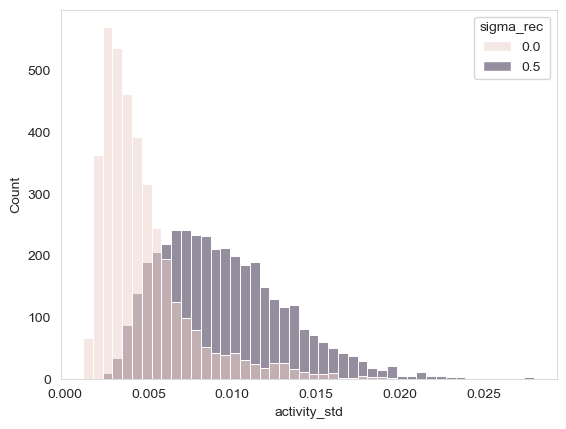

In [7]:
plt.figure()
sns.histplot(data = original_df, x = 'activity_std',hue = 'sigma_rec')

In [5]:
# Restrict to networks with dim and compute variance above dim


In [9]:
ids = ['EigvU3Hh','9pylOvH0','9pylOvH0','9pylOvH0','9pylOvH0','9pylOvH0','9pylOvH0']

/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_33595/734973661.py:58: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_proj[:, 0], y=x_proj[:, 1], color='gray', s=4, alpha=1, ax=ax,legend=False,palette ='husl')
/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_33595/734973661.py:58: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_proj[:, 0], y=x_proj[:, 1], color='gray', s=4, alpha=1, ax=ax,legend=False,palette ='husl')
/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_33595/734973661.py:58: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_proj[:, 0], y=x_proj[:, 1], color='gray', s=4, alpha=1, ax=ax,legend=False,palette ='husl')
/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_33595/734973661.py:58: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_

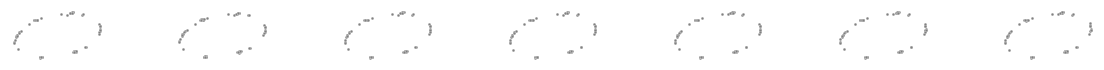

In [11]:

df_list = []
for filename in os.listdir('Results_2'):
    f = os.path.join('Results_2', filename)
    if os.path.isfile(f):
        df_list.append(pd.read_pickle(f))
original_df = pd.concat(df_list, ignore_index=True)
original_df = original_df[original_df.mse_z < .025]
#original_df = original_df[original_df.lambda_std == 0.1]
#original_df = original_df[original_df.activity_std < .1]


fig = plt.figure(figsize=(14,3))
gs = gridspec.GridSpec(1,7,wspace=.75)

for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100, input_size=2, dale=False)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    #net.sigma_rec = 0
    
    u, z, mask, conditions = generate_trials(
        n_trials=50)
    x = net(u).detach().cpu().numpy()
    
    rows = []
    for trial in range(u.shape[0]):
        rows.append({'trial': trial,
                     'motion': conditions[trial]['motion_coh'],
                     'response': x[trial, :, :]})
    model_df = pd.DataFrame(rows)
    model_df = model_df.groupby(['motion']).response.apply(lambda r: np.mean(np.stack(r), axis=0)).reset_index()
    
    responses = np.stack(model_df.response.values)
    responses = responses.reshape(-1, responses.shape[2]).T
    
    # z-score
    # responses = (responses - np.mean(responses, axis=1, keepdims=True)) / np.std(responses, axis=1, keepdims=True)
    # responses = responses[~np.isnan(responses).any(axis=1)]

    pca  = PCA().fit(responses)
    x_proj = pca.transform(responses)

    
    
    #clustering = KMeans(n_clusters=10, n_init=20).fit(responses)
   # labels = clustering.labels_
    # lut = dict(zip(pd.Series(np.sort(labels)).unique(), network_pal))
    # row_colors = pd.Series(np.sort(labels)).map(lut)
    # 

    sns.scatterplot(x=x_proj[:, 0], y=x_proj[:, 1], color='gray', s=4, alpha=1, ax=ax,legend=False,palette ='husl')
    
    #centers_proj = pca.transform(clustering.cluster_centers_)
    # 
    #sns.scatterplot(x=centers_proj[:, 0], y=centers_proj[:, 1], color='k', s=2, alpha=1, ax=ax, edgecolor=None,legend=False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    total_variance = np.sum((responses.T - np.mean(responses.T, axis=0, keepdims=True)) ** 2)
    #score = clustering.inertia_/total_variance
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(score,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=6,bottom=False)
    ax.yaxis.set_tick_params(labelsize=6,left=False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    # ax.set_xlim(-30,30)
    # ax.set_ylim(-30,30)
    ax.set_aspect('equal', adjustable='box')
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_c.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)



/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_79701/2832675000.py:37: UserWarning: The palette list has more values (50) than needed (9), which may not be intended.
  sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=2,alpha=1,palette = palette,edgecolor=None)
/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_79701/2832675000.py:38: UserWarning: The palette list has more values (50) than needed (9), which may not be intended.
  sns.scatterplot(data=new_df[new_df.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=.25,alpha=.5,palette = palette,edgecolor=None)
/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_79701/2832675000.py:37: UserWarning: The palette list has more values (50) than needed (9), which may not be intended.
  sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=2,alpha=1,palette = palette,edgecolor=None)
/var/folders/9_/yjc4d8zx4tj6kw6h

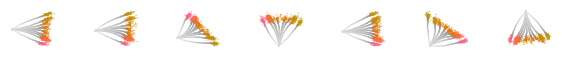

In [35]:
fig = plt.figure(figsize=(7,.5))
gs = gridspec.GridSpec(1,7,wspace=.75)
for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100, input_size=2, dale=False)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    x = net.forward(u).detach().numpy()
    x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
    #x = net(u)
    n_components = 2
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'motion': conditions[k]['motion_coh'],
                         'side': np.sign(conditions[k]['motion_coh']),
                         't': t,
                         'z_1': x_proj[k, t, 0],
                         'z_2': x_proj[k, t, 1], })
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()
#sns.blend_palette(["lightgray", "gray"]
    palette = sns.husl_palette(n_colors = 50,s=1)
    # sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=1,palette = sns.blend_palette(["lightgray", "gray"], as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=.75,alpha=1,palette = sns.light_palette("gray",as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=2,alpha=1,palette = palette,edgecolor=None)
    sns.scatterplot(data=new_df[new_df.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=.25,alpha=.5,palette = palette,edgecolor=None)

    # sns.scatterplot(data=new_df_mean[new_df_mean.t==74], x='z_1', y='z_2', ax=ax, legend=False, s=2, alpha=1, hue='motion',
    #                 palette=palette)
    # 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    variance = np.sum(pca.explained_variance_ratio_[2:])    
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_79701/151859260.py:46: UserWarning: The palette list has more values (50) than needed (9), which may not be intended.
  sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=1,alpha=1,palette = palette,edgecolor=None)
/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_79701/151859260.py:47: UserWarning: The palette list has more values (50) than needed (9), which may not be intended.
  sns.scatterplot(data=new_df[new_df.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=.25,alpha=.5,palette = palette,edgecolor=None)
/var/folders/9_/yjc4d8zx4tj6kw6h4xgj4zd80000gn/T/ipykernel_79701/151859260.py:46: UserWarning: The palette list has more values (50) than needed (9), which may not be intended.
  sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=1,alpha=1,palette = palette,edgecolor=None)
/var/folders/9_/yjc4d8zx4tj6kw6h4xg

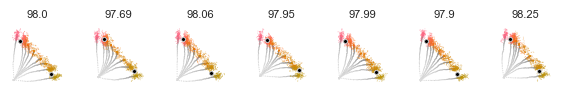

In [36]:
fig = plt.figure(figsize=(7,.75))
gs = gridspec.GridSpec(1,7,wspace=.5)

for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100, input_size=2, dale=False)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    x = net.forward(u).detach().numpy()
    #x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
    #x = net(u)
    n_components = 2
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x = net(u)
    output = net.output_layer(x).detach().numpy()
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'motion': conditions[k]['motion_coh'],
                         't': t,
                         'z_1': output[k, t, 0].item(),
                         'z_2': output[k, t, 1].item(),
                         'target_1': z[k, t, 0].item(),
                         'target_2': z[k, t, 1].item(), })
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()

    # sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=.5,alpha=.1,palette = palette,edgecolor=None)
    # 
    # sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=1, alpha=1, hue='t',
    #                 palette=palette)
    

    palette = sns.husl_palette(n_colors = 50,s=1)
    # sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=1,palette = sns.blend_palette(["lightgray", "gray"], as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=.5,alpha=1,palette = sns.light_palette("gray",as_cmap=True),edgecolor=None)
    sns.scatterplot(data=new_df_mean[new_df_mean.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=1,alpha=1,palette = palette,edgecolor=None)
    sns.scatterplot(data=new_df[new_df.t>70],x='z_1',y='z_2',hue='motion',ax=ax,legend=False,s=.25,alpha=.5,palette = palette,edgecolor=None)
    sns.scatterplot(data=new_df[new_df.t>57], x='target_1', y='target_2', ax=ax, legend=False, s=6, alpha=1,
            color='k')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    variance = np.sum(pca.explained_variance_ratio_[2:])   
    mse_z = net.mse_z(x.to(device), z.to(device), mask.to(device)).detach().cpu().numpy()
    ax.set_title(str(np.round((1-mse_z)*100,2)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

In [ ]:
fig = plt.figure(figsize=(7,.5))
gs = gridspec.GridSpec(1,7,wspace=.75)
palette = sns.husl_palette(s=1,n_colors=75)
for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100, input_size=2, dale=False)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    x = net.forward(u).detach().numpy()
    x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
    #x = net(u)
    n_components = 2
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'motion': conditions[k]['motion_coh'],
                         'side': np.sign(conditions[k]['motion_coh']),
                         't': t,
                         'z_1': x_proj[k, t, 0],
                         'z_2': x_proj[k, t, 1], })
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()

    palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)
    sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='side',ax=ax,legend=False,s=1,alpha=.1,palette = palette,edgecolor=None)
        
    sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=2, alpha=.5, hue='side',
                    palette=palette)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    variance = np.sum(pca.explained_variance_ratio_[2:])    
    #ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

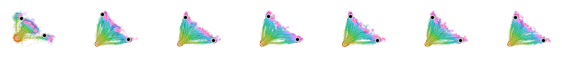

In [55]:
fig = plt.figure(figsize=(7,.5))
gs = gridspec.GridSpec(1,7,wspace=.75)
palette = sns.husl_palette(s=1,n_colors=75)

for i in range(7):

    ax=fig.add_subplot(gs[0,i])
    model_data = original_df[original_df.model_id == ids[i]]
    net = Net(n=100, input_size=2, dale=False)
    net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
    net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
    net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
    net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
    #net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
    net.sigma_in = 0.1
    net.sigma_rec = 0
    x = net.forward(u).detach().numpy()
    x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
    #x = net(u)
    n_components = 2
    pca = PCA()
    pca.fit(x.reshape(-1, x.shape[2]))
    x = net(u)
    output = net.output_layer(x).detach().numpy()
    rows = []
    for k in range(u.shape[0]):
        for t in range(u.shape[1]):
            rows.append({'trial': k,
                         'motion': conditions[k]['motion_coh'],
                         't': t,
                         'z_1': output[k, t, 0].item(),
                         'z_2': output[k, t, 1].item(),
                         'target_1': z[k, t, 0].item(),
                         'target_2': z[k, t, 1].item(), })
    new_df = pd.DataFrame(rows)
    new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()

    sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=.1,palette = palette,edgecolor=None)
    
    sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=2, alpha=.5, hue='t',
                    palette=palette)
    
    sns.scatterplot(data=new_df[new_df.t>57], x='target_1', y='target_2', ax=ax, legend=False, s=6, alpha=1,
                    color='k')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel("PC 1", fontsize=7)
    ax.set_ylabel("PC 2", fontsize=7)
    
    variance = np.sum(pca.explained_variance_ratio_[2:])   
    mse_z = net.mse_z(x.to(device), z.to(device), mask.to(device)).detach().cpu().numpy()
    #ax.set_title(str(np.round((1-mse_z)*100,2)),fontsize=8)
    ax.xaxis.set_tick_params(labelsize=7, bottom=True)
    ax.yaxis.set_tick_params(labelsize=7, left=True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
fig.savefig('/Users/cl1704/PycharmProjects/Clustering/Figures/MainFig_1_d.jpg',
    format='jpeg',
    dpi=450,
            bbox_inches='tight'
)

In [20]:
model_data = original_df[original_df.model_id == 'EigvU3Hh']
#net = torch.load('net.pth')
net = Net(n=100, input_size=2, dale=False)
net.recurrent_layer.weight.data = torch.tensor(model_data['w_rec'].item())
net.recurrent_layer.bias.data = torch.tensor(model_data['bias'].item())
net.input_layer.weight.data = torch.tensor(model_data['w_in'].item())
net.output_layer.weight.data = torch.tensor(model_data['w_out'].item())
#net.activation = torch.nn.Softplus(beta=model_data['beta'].item())
net.sigma_in = 0.
net.sigma_rec = 0

u, z, mask, conditions = generate_trials(
    n_trials=25)
x = net(u).detach().cpu().numpy()

rows = []
for trial in range(u.shape[0]):
    rows.append({'trial': trial,
                 'motion': conditions[trial]['motion_coh'],
                 'response': x[trial, :, :]})
model_df = pd.DataFrame(rows)
model_df = model_df.groupby(['motion']).response.apply(lambda r: np.mean(np.stack(r), axis=0)).reset_index()

responses = np.stack(model_df.response.values)
responses = responses.reshape(-1, responses.shape[2]).T

# z_score
# responses = (responses - np.mean(responses, axis=1, keepdims=True)) / np.std(responses, axis=1, keepdims=True)
# responses = responses[~np.isnan(responses).any(axis=1)]

FileNotFoundError: [Errno 2] No such file or directory: 'net.pth'

In [48]:
x = net(u)
net.mse_z(x.to(device), z.to(device), mask.to(device))

tensor(0.0106, grad_fn=<MseLossBackward0>)

In [49]:
torch.std(torch.std(x, dim=[0, 1]))

tensor(0.0053, grad_fn=<StdBackward0>)

<Axes: ylabel='Count'>

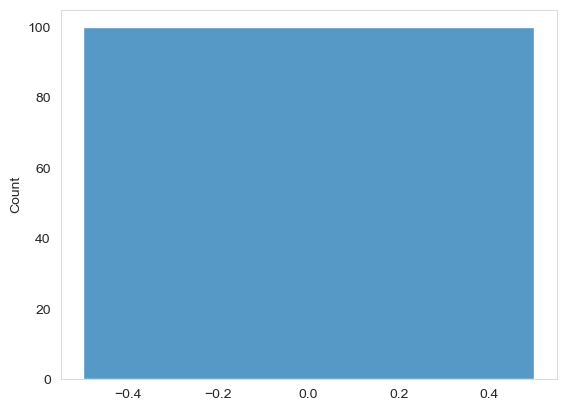

In [7]:
plt.figure()
sns.histplot(net.recurrent_layer.bias.data)

<Axes: ylabel='Count'>

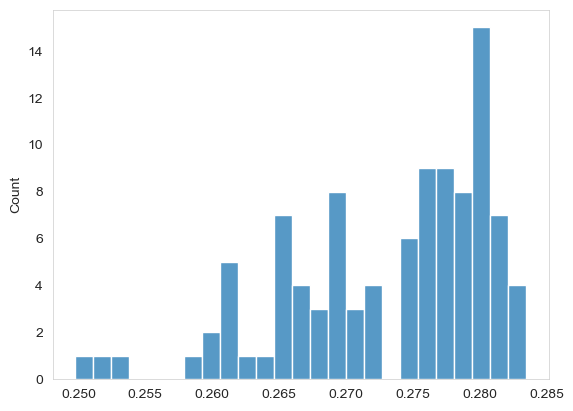

In [21]:
plt.figure()
sns.histplot(x = np.std(x, axis = (0,1)),bins=25)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

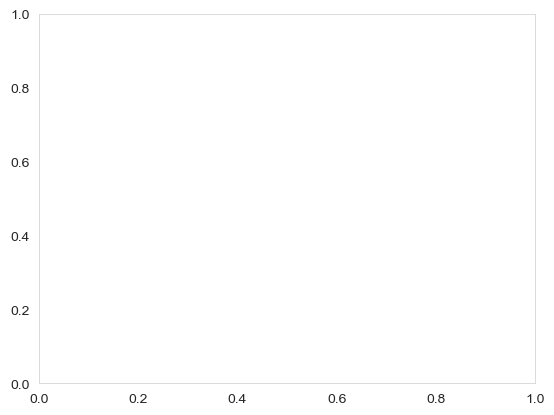

In [50]:
plt.figure()
plt.plot(x[0,:,4],marker='.')

0.30267439640493515


FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2/Figures/Fig_2afc_b.jpg'

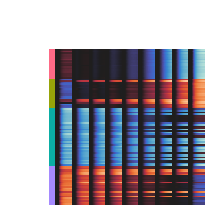

In [22]:
## CLUSTERED RESPONSE MATRIX        
#_,k = compute_k(responses,5,25,.05)
#k = model_data.k.values[0]
k = 4
clustering = KMeans(n_clusters=k, n_init=20).fit(responses)
total_variance = np.sum((responses.T - np.mean(responses.T, axis=0, keepdims=True)) ** 2)
print(clustering.inertia_ / total_variance)
labels = clustering.labels_
sort = np.argsort(labels)
sorted_responses = responses[sort, :]
sns.husl_palette(s=.4)
network_pal = sns.husl_palette(pd.Series(np.sort(labels)).unique().size, s=1)
lut = dict(zip(pd.Series(np.sort(labels)).unique(), network_pal))
row_colors = pd.Series(np.sort(labels)).map(lut)
g = sns.clustermap(pd.DataFrame((sorted_responses)), row_cluster=False, col_cluster=False, row_colors=row_colors,
                   figsize=(2.25, 2.25), cbar_pos=None, xticklabels=False, yticklabels=False, center=0)
ax = g.ax_heatmap

g.savefig('Figures/Fig_2afc_b.jpg',
          format='jpeg',
          dpi=450,
          bbox_inches='tight'
          )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2/Figures/Fig1c.jpg'

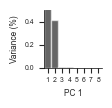

In [23]:
## PCA
fig = plt.figure(figsize=(.75,.75))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])
pca = PCA().fit(responses.T)
sns.barplot(x = np.arange(1,9),y=pca.explained_variance_ratio_[:8],alpha=.6,ax=ax,color='k',width=1)
ax.set_xlabel("PC 1", fontsize=6)
ax.set_ylabel("Variance (%)", fontsize=6)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=5, bottom=True)
ax.yaxis.set_tick_params(labelsize=5, left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,.5)
plt.savefig('Figures/Fig1c.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight'
            )


FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2/Figures/Fig_2afc_c.jpg'

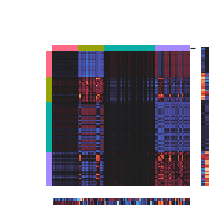

In [24]:

## RECURRENT MATRIX

sort = np.argsort(labels)
w = net.recurrent_layer.weight.data
w_in = net.input_layer.weight.data
w_out = net.output_layer.weight.data

w = w[sort, :]
w = w[:, sort]
w_in = w_in[sort, :]
w_out = w_out[:, sort]

g = sns.clustermap(pd.DataFrame(w), center=0, row_cluster=False, col_cluster=False, row_colors=row_colors,
                   col_colors=row_colors, figsize=(2.25, 2.25), cbar_pos=None, xticklabels=False, yticklabels=False)

g.gs.update(left=0.05, right=0.85, bottom=.15)
gs2 = matplotlib.gridspec.GridSpec(1, 1, left=.9, top=.77, bottom=.15)
ax2 = g.fig.add_subplot(gs2[0])
sns.heatmap(w_in, ax=ax2, cbar=False, xticklabels=False, yticklabels=False, center=0)

gs3 = matplotlib.gridspec.GridSpec(1, 1, left=.24, top=.1, right=.85)
ax3 = g.fig.add_subplot(gs3[0])
sns.heatmap(w_out, ax=ax3, cbar=False, xticklabels=False, yticklabels=False, center=0)

g.savefig('Figures/Fig_2afc_c.jpg',
          format='jpeg',
          dpi=450,
          bbox_inches='tight'
          )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2/Figures/Fig1c.jpg'

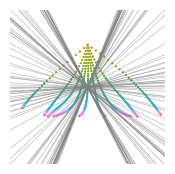

In [25]:
# HYPERPLANES
from sklearn.decomposition import PCA
#import seaborn as sns
from sympy import *
from sympy.plotting import plot
from sympy.plotting import plot_implicit

x = net.forward(u)
n_neurons = x.shape[2]
#Restrict to act

pca = PCA()
pca.fit(x.detach().numpy().reshape(-1,x.shape[2]))

U = pca.components_[:2,:].T
#U = latent_net.module_.q[:2,:].t().detach()
w = net.recurrent_layer.weight.data
#w = w-np.eye(50)
w_in = net.input_layer.weight.data

b = net.recurrent_layer.bias.data

H = w @ U 
#H = H[sort,:]
proj_rates = pca.transform(x.detach().reshape(-1,x.shape[2]))
proj_rates = proj_rates.reshape(-1,75,x.shape[2])

fig = plt.figure(figsize=(2,2))
gs = gridspec.GridSpec(1,1)
ax=fig.add_subplot(gs[0,0])

lim =5
xx,yy = np.linspace(-lim,lim), np.linspace(-lim,lim)
x,y = np.meshgrid(xx,yy)
for i in range(n_neurons):
#for i in np.argwhere(labels==0):

    magnitude = np.linalg.norm(H[i,:].numpy())

    #ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors=network_pal.as_hex()[labels[i]],linewidths=.75)
    ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors='gray',linewidths=.5,alpha=.5)

#for i in range(n_neurons):
# for i in np.argwhere(labels==0):
# 
#     magnitude = np.linalg.norm(H[i,:].numpy())
# 
#     #ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors=network_pal.as_hex()[labels[i]],linewidths=.75)
#     ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],color='gray',linewidths=.75,alpha=1)


# for i in np.argwhere(labels==1):
# 
#     magnitude = np.linalg.norm(H[i,:].numpy())
# 
#     #ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],colors=network_pal.as_hex()[labels[i]],linewidths=.75)
#     ax.contour(x, y, x*H[i,0].numpy() + y*H[i,1].numpy()+b[i].numpy(), [0],color='gray',linewidths=.75)


# for i in range(25):
#     ax.plot(proj_rates[i,:,0],proj_rates[i,:,1],lw=1)
x = net.forward(u).detach().cpu().numpy()
pca = PCA()
pca.fit(x.reshape(-1, x.shape[2]))
x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
rows = []
for k in range(u.shape[0]):
    for t in range(u.shape[1]):
        rows.append({'trial': k,
                     'motion': conditions[k]['motion_coh'],
                     't': t,
                     'z_1': x_proj[k, t, 0],
                     'z_2': x_proj[k, t, 1], })
new_df = pd.DataFrame(rows)
new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()

palette = sns.husl_palette(75, s=1)

sns.scatterplot(data=new_df,x='z_1',y='z_2',hue='t',ax=ax,legend=False,s=1,alpha=.1,edgecolor=None,palette = palette)
    
sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=3, alpha=.5, hue='t',
                palette=palette)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.savefig('Figures/Fig1c.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight'
            )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2/Figures/Fig1c.jpg'

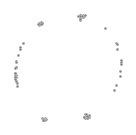

In [26]:
## LDA
# responses = PCA(n_components=50).fit_transform(responses)
# clf = LinearDiscriminantAnalysis(tol=2e-1)
# clf.fit(responses, labels)

#responses = responses + 1 * (2 * np.random.rand(*responses.shape) - 1)
x_proj = PCA().fit_transform(responses)
#x_proj = clf.transform(responses)

lut = dict(zip(pd.Series(np.sort(labels)).unique(), network_pal))
row_colors = pd.Series(np.sort(labels)).map(lut)

fig = plt.figure(figsize=(1.5, 1.5))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
sns.scatterplot(x=x_proj[np.argsort(labels), 0], y=x_proj[np.argsort(labels), 1], color='gray', s=4, alpha=1, ax=ax)

# centers_proj = clf.transform(clustering.cluster_centers_)
# 
# sns.scatterplot(x=centers_proj[:, 0], y=centers_proj[:, 1], color='k', s=3, alpha=1, ax=ax, edgecolor=None)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(labelsize=8, bottom=True)
ax.yaxis.set_tick_params(labelsize=8, left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# ax.set_xlim(-30,30)
# ax.set_ylim(-30,30)
#ax.set_aspect('equal', adjustable='box')
plt.savefig('Figures/Fig1c.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight'
            )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2/Figures/Exp_2_Fig_1.jpg'

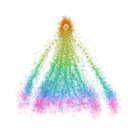

In [35]:
# STATE SPACE
#palette = sns.color_palette("coolwarm", n_colors=50,as_cmap=False)
palette = sns.husl_palette(75, s=1)

net.sigma_in = 0.1
net.sigma_rec = 0
x = net.forward(u).detach().numpy()
x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
#x = net(u)
n_components = 2
pca = PCA()
pca.fit(x.reshape(-1, x.shape[2]))
x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
rows = []
for k in range(u.shape[0]):
    for t in range(u.shape[1]):
        rows.append({'trial': k,
                     'motion': conditions[k]['motion_coh'],
                     't': t,
                     'z_1': x_proj[k, t, 0],
                     'z_2': x_proj[k, t, 1], })
new_df = pd.DataFrame(rows)
new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()
fig = plt.figure(figsize=(1.5, 1.5))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
#palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.scatterplot(data=new_df, x='z_1', y='z_2', hue='t', ax=ax, legend=False, s=1, alpha=.1, palette=palette,
                edgecolor=None)

sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=3, alpha=.5, hue='t',
                palette=palette)
# sns.scatterplot(data=new_df_mean[new_df_mean.t==74],x='z_1',y='z_2',ax=ax,legend=False,s=6,alpha=1,hue='theta',palette=palette)

# Model predictions


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("PC 1", fontsize=7)
ax.set_ylabel("PC 2", fontsize=7)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=7, bottom=True)
ax.yaxis.set_tick_params(labelsize=7, left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.gca().patch.set_alpha(0)
# ax.set_xlim(-1.25,1.25)
# ax.set_ylim(-1.25,1.25)
matplotlib.rcParams['savefig.transparent'] = True
fig.savefig('Figures/Exp_2_Fig_1.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight', transparent=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2/Figures/Exp_2_Fig_1.jpg'

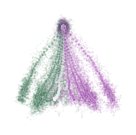

In [36]:
# STATE SPACE
#palette = sns.color_palette("coolwarm", n_colors=50,as_cmap=False)
palette = sns.husl_palette(75, s=1)

net.sigma_in = 0.1
net.sigma_rec = 0
x = net.forward(u).detach().numpy()
x = (x - np.mean(x, axis=(0, 1), keepdims=True)) / np.std(x, axis=(0, 1), keepdims=True)
#x = net(u)
n_components = 2
pca = PCA()
pca.fit(x.reshape(-1, x.shape[2]))
x_proj = pca.transform(x.reshape(-1, x.shape[2])).reshape(x.shape[0], x.shape[1], x.shape[2])
rows = []
for k in range(u.shape[0]):
    for t in range(u.shape[1]):
        rows.append({'trial': k,
                     'motion': conditions[k]['motion_coh'],
                     'side': np.sign(conditions[k]['motion_coh']),
                     't': t,
                     'z_1': x_proj[k, t, 0],
                     'z_2': x_proj[k, t, 1], })
new_df = pd.DataFrame(rows)
new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()
fig = plt.figure(figsize=(1.5, 1.5))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)
sns.scatterplot(data=new_df, x='z_1', y='z_2', hue='side', ax=ax, legend=False, s=1, alpha=.1, palette=palette,
                edgecolor=None)

sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=3, alpha=.5, hue='side',
                palette=palette)
# sns.scatterplot(data=new_df_mean[new_df_mean.t==74],x='z_1',y='z_2',ax=ax,legend=False,s=6,alpha=1,hue='theta',palette=palette)

# Model predictions


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("PC 1", fontsize=7)
ax.set_ylabel("PC 2", fontsize=7)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=7, bottom=True)
ax.yaxis.set_tick_params(labelsize=7, left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.gca().patch.set_alpha(0)
# ax.set_xlim(-1.25,1.25)
# ax.set_ylim(-1.25,1.25)
matplotlib.rcParams['savefig.transparent'] = True
fig.savefig('Figures/Exp_2_Fig_1.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight', transparent=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cl1704/PycharmProjects/clustering_in_rnns/Experiment_2/Figures/Exp_2_Fig_2.jpg'

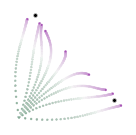

In [37]:




## RESPONSE MATRIX





u, z, mask, conditions = generate_trials(
    n_trials=25)
net.sigma_in = 0.
net.sigma_rec = 0

x = net(u)
output = net.output_layer(x).detach().numpy()
rows = []
for k in range(u.shape[0]):
    for t in range(u.shape[1]):
        rows.append({'trial': k,
                     'motion': conditions[k]['motion_coh'],
                     't': t,
                     'z_1': output[k, t, 0].item(),
                     'z_2': output[k, t, 1].item(),
                     'target_1': z[k, t, 0].item(),
                     'target_2': z[k, t, 1].item(), })
new_df = pd.DataFrame(rows)
new_df_mean = new_df.groupby(['motion', 't']).mean().reset_index()
fig = plt.figure(figsize=(1.5, 1.5))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])

sns.scatterplot(data=new_df, x='z_1', y='z_2', hue='t', ax=ax, legend=False, s=1, alpha=.1, palette=palette,
                edgecolor=None)

sns.scatterplot(data=new_df_mean, x='z_1', y='z_2', ax=ax, legend=False, s=3, alpha=1, hue='t',
                palette=palette)

sns.scatterplot(data=new_df[new_df.t > 57], x='target_1', y='target_2', ax=ax, legend=False, s=6, alpha=1,
                color='k')

# Plot targets


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("PC 1", fontsize=7)
ax.set_ylabel("PC 2", fontsize=7)
#ax.set_title(r'$\sum_{i\geq 2}\lambda_i = $'+str(np.round(variance,4)),fontsize=8)
ax.xaxis.set_tick_params(labelsize=7, bottom=True)
ax.yaxis.set_tick_params(labelsize=7, left=True)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]

fig.savefig('Figures/Exp_2_Fig_2.jpg',
            format='jpeg',
            dpi=450,
            bbox_inches='tight')



In [30]:
mse_z = net.mse_z(x.to(device), z.to(device), mask.to(device))

In [31]:
mse_z

tensor(0.0512, grad_fn=<MseLossBackward0>)